In [169]:
# importing necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [170]:
# getting the data.
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [171]:
# getting the basic information about the columns and their data-type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [172]:
# dropping the columns with nominal data.
df= df.drop(columns=["Item_Identifier","Outlet_Identifier"])

In [173]:
# checking for duplicates.
df.duplicated().value_counts()

False    8523
dtype: int64

In [174]:
# checking for null values.
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [175]:
# filling the null values with mean of the column.
df["Item_Weight"]= df["Item_Weight"].fillna(df["Item_Weight"].mean())

# filling the null values with mode of the column.
df["Outlet_Size"]= df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

In [176]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [177]:
# checking the different categories in "Item_Fat_Content" column.
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [178]:
# Looks like some values of "Low Fat" and "Regular" are present in a different way.
# So lets replace them with "Low Fat" and "Regular" values to bring uniformity in the data.

df["Item_Fat_Content"]= df["Item_Fat_Content"].replace("LF","Low Fat")
df["Item_Fat_Content"]= df["Item_Fat_Content"].replace("reg","Regular")
df["Item_Fat_Content"]= df["Item_Fat_Content"].replace("low fat","Low Fat")

In [179]:
# checking the column after replacing.
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [180]:
# checking the different categories in "Item_Type" column.
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [181]:
# checking the different categories in "Outlet_Size" column.
df["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [182]:
# checking the different categories in "Outlet_Location_Type" column.
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [183]:
# checking the different categories in "Outlet_Type" column.
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

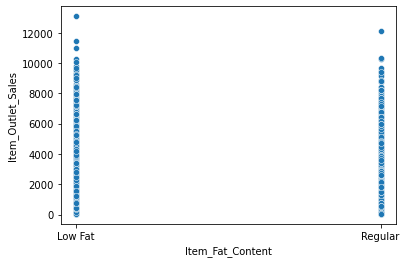

In [184]:
# Scatter-plot of "Item_Fat_Content" vs our target variable.
sns.scatterplot(x=df["Item_Fat_Content"],y=df["Item_Outlet_Sales"])

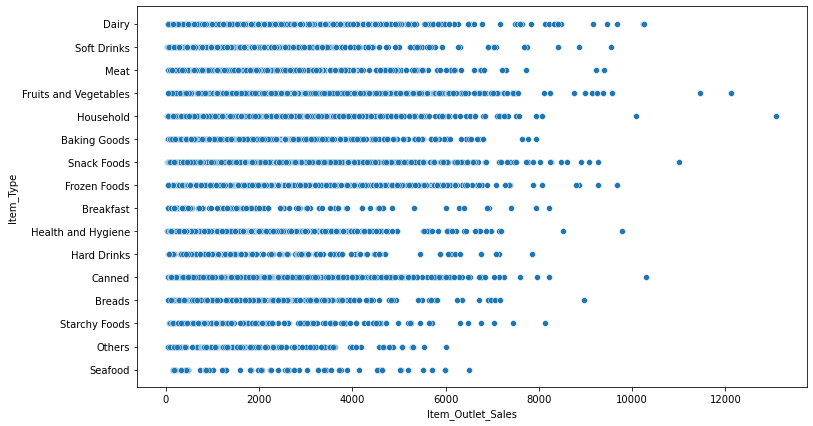

In [185]:
# Scatter-plot of "Item_Type" vs our target variable.
plt.figure(figsize=(12,7))
sns.scatterplot(y=df["Item_Type"],x=df["Item_Outlet_Sales"])
plt.show()

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

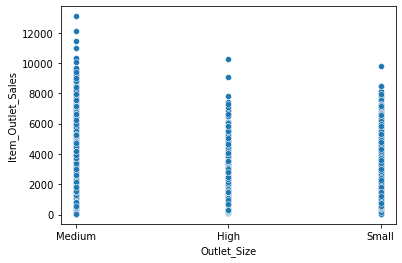

In [186]:
# Scatter-plot of "Outlet_Size" vs our target variable.
sns.scatterplot(x=df["Outlet_Size"],y=df["Item_Outlet_Sales"])

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

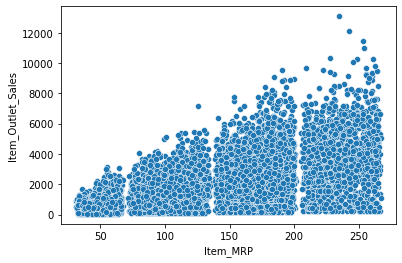

In [187]:
# Scatter-plot of "Item_MRP" vs our target variable.
sns.scatterplot(x=df["Item_MRP"],y=df["Item_Outlet_Sales"])

In [188]:
# Using Label-Encoder to encode our categorical columns into numerical format so that regression can be applied.
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

df["Item_Fat_Content"]= enc.fit_transform(df["Item_Fat_Content"])
df["Item_Type"]= enc.fit_transform(df["Item_Type"])
df["Outlet_Size"]= enc.fit_transform(df["Outlet_Size"])
df["Outlet_Location_Type"]= enc.fit_transform(df["Outlet_Location_Type"])
df["Outlet_Type"]= enc.fit_transform(df["Outlet_Type"])

In [189]:
# Let's look at some of the properties of our dataset.
df.describe().T

# Observations:
# 1. The scale of data in different columns vary a lot. Hence the data needs to be scaled.
# 2. In the Item_Visibility" which have continuous data, it can be seen that the standard deviation is
#    high when we compare it with the mean. We need to check the plot and skewness.


,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Fat_Content,8523.0,0.352693,0.477836,0.000,0.000000,0.000000,1.000000,1.000000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_Type,8523.0,7.226681,4.209990,0.000,4.000000,6.000000,10.000000,15.000000
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Outlet_Size,8523.0,1.170832,0.600327,0.000,1.000000,1.000000,2.000000,2.000000
Outlet_Location_Type,8523.0,1.112871,0.812757,0.000,0.000000,1.000000,2.000000,2.000000
Outlet_Type,8523.0,1.201220,0.796459,0.000,1.000000,1.000000,1.000000,3.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


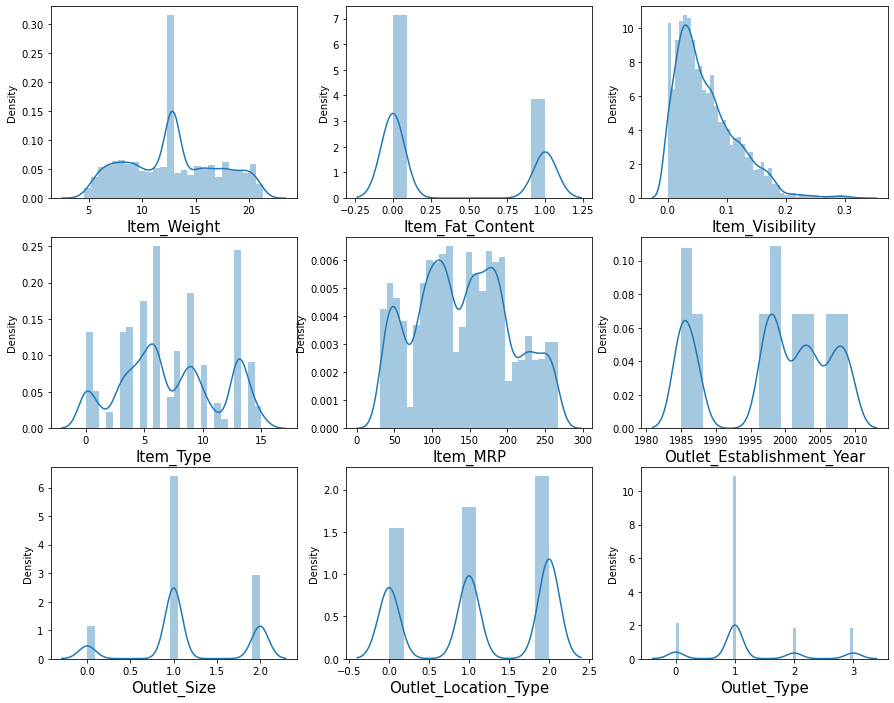

In [190]:
# Let's visualize the data-distribution using distplot.
plt.figure(figsize=(15,12))
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [191]:
# checking the skewness of the data for the continuous data columns.
df.skew()

# "Item_Visibility" has skewness.

Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

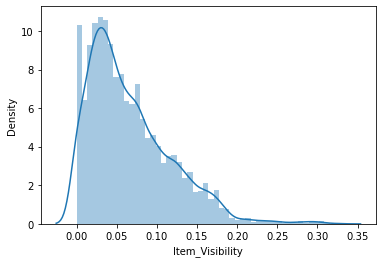

In [192]:
# Dist-plot of "Item_Visibility" column.
sns.distplot(df["Item_Visibility"])

<AxesSubplot:xlabel='Item_Visibility'>

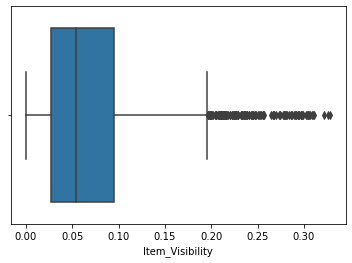

In [193]:
# Box-plot of "Item_Visibility" column.
sns.boxplot(df["Item_Visibility"])

# It can be seen that there are some outliers in the data.

In [194]:
# Let's remove the outliers using IQR method.
percentile25 = df['Item_Visibility'].quantile(0.25)
percentile75 = df['Item_Visibility'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['Item_Visibility'] < upper_limit]
df = df[df['Item_Visibility'] > lower_limit]

df.shape

(8379, 10)

Skewness: 0.7381530535625506


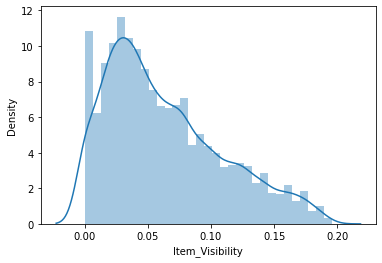

In [195]:
# Let's check the skewness and distribution now.
sns.distplot(df["Item_Visibility"])
print("Skewness:",df["Item_Visibility"].skew())

# Skewness still there.

In [196]:
# Let's apply power-transformation on the "Item_Visibility" column.
from sklearn.preprocessing import PowerTransformer

pt= PowerTransformer(method="yeo-johnson")
df["Item_Visibility"]= pt.fit_transform(df[["Item_Visibility"]])

Skewness: 0.11175901528482418


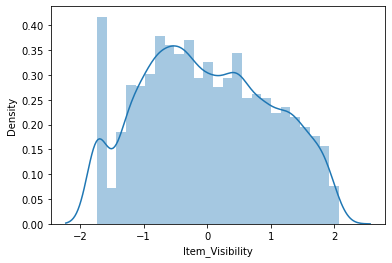

In [197]:
# Let's check the skewness and distribution now.
sns.distplot(df["Item_Visibility"])
print("Skewness:",df["Item_Visibility"].skew())

# Skewness has come down to an acceptable level.

In [198]:
# Let's check for outliers in other continuous data columns.

<AxesSubplot:xlabel='Item_Weight'>

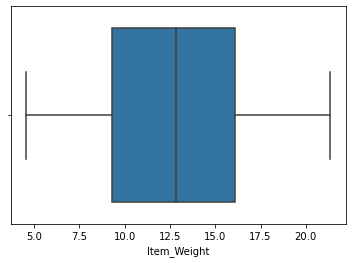

In [199]:
# Box-plot of "Item_Weight" column. 
sns.boxplot(df["Item_Weight"])

# No outliers can be seen.

<AxesSubplot:xlabel='Item_MRP'>

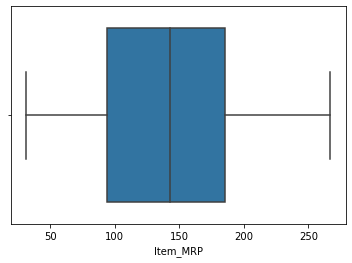

In [200]:
# Box-plot of "Item_MRP" column. 
sns.boxplot(df["Item_MRP"])

# No outliers can be seen.

In [201]:
# Lets check for correlation among the columns now.

In [202]:
# Correlation matrix.
corr= df.corr()
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021636,-0.008006,0.027880,0.025431,-0.008421,-0.007788,0.006004,-0.003196,0.009691
Item_Fat_Content,-0.021636,1.000000,0.048850,-0.139943,0.008048,0.003918,-0.000838,-0.002739,0.005449,0.021670
Item_Visibility,-0.008006,0.048850,1.000000,-0.039549,0.003336,-0.025265,0.032893,-0.012944,-0.087120,-0.064705
Item_Type,0.027880,-0.139943,-0.039549,1.000000,0.029461,0.004399,-0.001519,0.003488,0.001135,0.016017
Item_MRP,0.025431,0.008048,0.003336,0.029461,1.000000,0.006896,0.004368,0.002638,-0.001426,0.577367
Outlet_Establishment_Year,-0.008421,0.003918,-0.025265,0.004399,0.006896,1.000000,0.216979,-0.111056,-0.147786,-0.065382
Outlet_Size,-0.007788,-0.000838,0.032893,-0.001519,0.004368,0.216979,1.000000,-0.608219,-0.191238,-0.076552
Outlet_Location_Type,0.006004,-0.002739,-0.012944,0.003488,0.002638,-0.111056,-0.608219,1.000000,0.477017,0.087446
Outlet_Type,-0.003196,0.005449,-0.087120,0.001135,-0.001426,-0.147786,-0.191238,0.477017,1.000000,0.385038
Item_Outlet_Sales,0.009691,0.021670,-0.064705,0.016017,0.577367,-0.065382,-0.076552,0.087446,0.385038,1.000000


<AxesSubplot:>

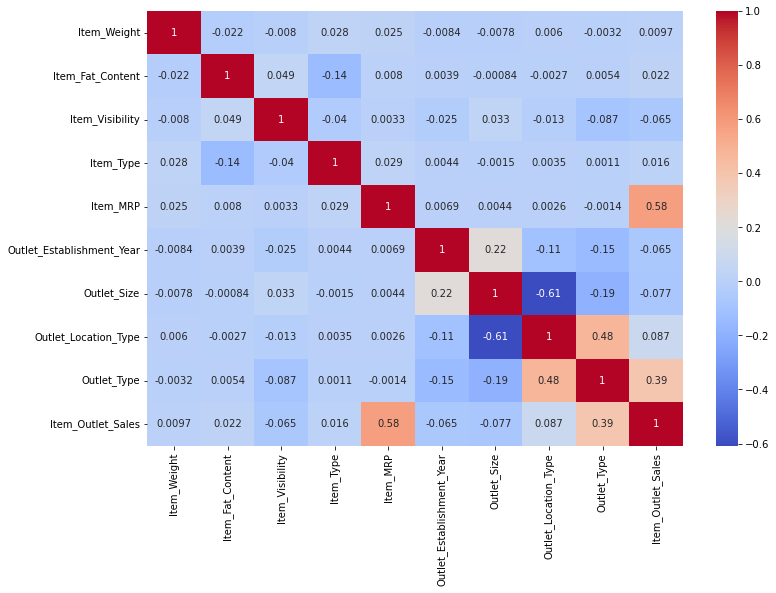

In [203]:
# Let's see the correlation heat-map.
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# From the heat-map no multicollinearity can be seen.

In [204]:
# Let's check the relation of our feature columns with our target variable.
corr["Item_Outlet_Sales"]

# "Item_Weight","Item_Fat_Content","Item_Type" features seem to be very weakly related with our target variable.(correlation value<0.05)

Item_Weight                  0.009691
Item_Fat_Content             0.021670
Item_Visibility             -0.064705
Item_Type                    0.016017
Item_MRP                     0.577367
Outlet_Establishment_Year   -0.065382
Outlet_Size                 -0.076552
Outlet_Location_Type         0.087446
Outlet_Type                  0.385038
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [205]:
# Dropping the very weakly related columns.
df= df.drop(columns=["Item_Weight","Item_Fat_Content","Item_Type"])

# Observation:
# Fat content in a product doesn't matter much.

In [206]:
df.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.139877,249.8092,1999,1,0,1,3735.1380
1,-1.030228,48.2692,2009,1,2,2,443.4228
2,-1.115421,141.6180,1999,1,0,1,2097.2700
3,-1.732951,182.0950,1998,1,2,0,732.3800
4,-1.732951,53.8614,1987,0,2,1,994.7052


In [207]:
# Separating target variable and features.
X= df.drop(columns=["Item_Outlet_Sales"])
y= df["Item_Outlet_Sales"]

In [208]:
# Scaling the data using Standard-Scaler.
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_scaled= scaler.fit_transform(X)

In [209]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# All values seems to be under acceptable level.

        vif                   Features
0  1.013112            Item_Visibility
1  1.000119                   Item_MRP
2  1.073434  Outlet_Establishment_Year
3  1.698077                Outlet_Size
4  2.043031       Outlet_Location_Type
5  1.361818                Outlet_Type


In [215]:
############################################## ADABOOST REGRESSION #############################################################

from sklearn.ensemble import AdaBoostRegressor

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)

    ada = AdaBoostRegressor()
    ada.fit(x_train, y_train)

    y_pred_train = ada.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= ada.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 53.45
Testing Score for sample 0 : 54.16
Mean Absolute Error 861.8
Root Mean Squared Error 1139.78


Training Score for sample 1 : 54.59
Testing Score for sample 1 : 54.86
Mean Absolute Error 883.37
Root Mean Squared Error 1155.04


Training Score for sample 2 : 54.81
Testing Score for sample 2 : 49.42
Mean Absolute Error 909.58
Root Mean Squared Error 1197.63


Training Score for sample 3 : 52.37
Testing Score for sample 3 : 51.32
Mean Absolute Error 922.0
Root Mean Squared Error 1199.31


Training Score for sample 4 : 53.3
Testing Score for sample 4 : 53.73
Mean Absolute Error 931.82
Root Mean Squared Error 1211.73


Training Score for sample 5 : 53.12
Testing Score for sample 5 : 53.55
Mean Absolute Error 862.13
Root Mean Squared Error 1139.87


Training Score for sample 6 : 50.51
Testing Score for sample 6 : 47.6
Mean Absolute Error 930.35
Root Mean Squared Error 1195.06


Training Score for sample 7 : 53.38
Testing Score for sample 7 : 50.22
Mean Abso

In [216]:
######################################### XTREME-GRADIENT BOOST REGRESSION #####################################################

import xgboost as xgb

xgb= xgb.XGBRegressor()
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    
    xgb.fit(x_train,y_train)

    y_pred_train = xgb.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= xgb.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 82.04
Testing Score for sample 0 : 54.28
Mean Absolute Error 798.31
Root Mean Squared Error 1138.33


Training Score for sample 1 : 83.05
Testing Score for sample 1 : 54.28
Mean Absolute Error 829.57
Root Mean Squared Error 1162.44


Training Score for sample 2 : 82.71
Testing Score for sample 2 : 49.37
Mean Absolute Error 830.12
Root Mean Squared Error 1198.22


Training Score for sample 3 : 82.31
Testing Score for sample 3 : 54.63
Mean Absolute Error 816.38
Root Mean Squared Error 1157.8


Training Score for sample 4 : 83.0
Testing Score for sample 4 : 52.99
Mean Absolute Error 851.6
Root Mean Squared Error 1221.38


Training Score for sample 5 : 82.21
Testing Score for sample 5 : 53.72
Mean Absolute Error 796.74
Root Mean Squared Error 1137.79


Training Score for sample 6 : 82.78
Testing Score for sample 6 : 50.91
Mean Absolute Error 816.42
Root Mean Squared Error 1156.75


Training Score for sample 7 : 82.66
Testing Score for sample 7 : 51.45
Mean Abs

In [217]:
############################################## RANDOM FOREST REGRESSION ########################################################

from sklearn.ensemble import RandomForestRegressor

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)

    rf= RandomForestRegressor(n_jobs=-1)
    rf.fit(x_train,y_train)

    y_pred_train = rf.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= rf.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 93.5
Testing Score for sample 0 : 56.25
Mean Absolute Error 778.16
Root Mean Squared Error 1113.49


Training Score for sample 1 : 93.54
Testing Score for sample 1 : 56.38
Mean Absolute Error 808.32
Root Mean Squared Error 1135.45


Training Score for sample 2 : 93.77
Testing Score for sample 2 : 50.36
Mean Absolute Error 831.39
Root Mean Squared Error 1186.48


Training Score for sample 3 : 93.5
Testing Score for sample 3 : 54.84
Mean Absolute Error 812.82
Root Mean Squared Error 1155.15


Training Score for sample 4 : 93.52
Testing Score for sample 4 : 55.03
Mean Absolute Error 827.75
Root Mean Squared Error 1194.64


Training Score for sample 5 : 93.48
Testing Score for sample 5 : 54.88
Mean Absolute Error 780.49
Root Mean Squared Error 1123.42


Training Score for sample 6 : 93.54
Testing Score for sample 6 : 52.35
Mean Absolute Error 815.65
Root Mean Squared Error 1139.68


Training Score for sample 7 : 93.62
Testing Score for sample 7 : 52.15
Mean Ab

In [218]:
############################################### LINEAR REGRESSION ##############################################################

from sklearn.linear_model import LinearRegression

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)

    lr= LinearRegression()
    lr.fit(x_train,y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 50.08
Testing Score for sample 0 : 51.45
Mean Absolute Error 877.98
Root Mean Squared Error 1173.03


Training Score for sample 1 : 49.97
Testing Score for sample 1 : 51.71
Mean Absolute Error 891.99
Root Mean Squared Error 1194.58


Training Score for sample 2 : 50.54
Testing Score for sample 2 : 49.33
Mean Absolute Error 894.05
Root Mean Squared Error 1198.69


Training Score for sample 3 : 50.32
Testing Score for sample 3 : 50.47
Mean Absolute Error 912.9
Root Mean Squared Error 1209.75


Training Score for sample 4 : 50.02
Testing Score for sample 4 : 51.44
Mean Absolute Error 919.24
Root Mean Squared Error 1241.43


Training Score for sample 5 : 50.16
Testing Score for sample 5 : 51.05
Mean Absolute Error 872.01
Root Mean Squared Error 1170.12


Training Score for sample 6 : 50.16
Testing Score for sample 6 : 51.17
Mean Absolute Error 882.7
Root Mean Squared Error 1153.61


Training Score for sample 7 : 51.1
Testing Score for sample 7 : 47.11
Mean Abs

In [219]:
############################################## K-NEIGHBORS REGRESSION ##########################################################

from sklearn.neighbors import KNeighborsRegressor

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)

    knr= KNeighborsRegressor()
    knr.fit(x_train,y_train)

    y_pred_train = knr.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= knr.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 68.28
Testing Score for sample 0 : 52.78
Mean Absolute Error 811.02
Root Mean Squared Error 1156.79


Training Score for sample 1 : 67.63
Testing Score for sample 1 : 54.32
Mean Absolute Error 823.36
Root Mean Squared Error 1161.85


Training Score for sample 2 : 68.98
Testing Score for sample 2 : 50.47
Mean Absolute Error 834.05
Root Mean Squared Error 1185.17


Training Score for sample 3 : 67.78
Testing Score for sample 3 : 55.31
Mean Absolute Error 818.99
Root Mean Squared Error 1149.08


Training Score for sample 4 : 68.36
Testing Score for sample 4 : 53.99
Mean Absolute Error 830.92
Root Mean Squared Error 1208.35


Training Score for sample 5 : 68.93
Testing Score for sample 5 : 51.75
Mean Absolute Error 809.02
Root Mean Squared Error 1161.81


Training Score for sample 6 : 68.14
Testing Score for sample 6 : 53.04
Mean Absolute Error 810.25
Root Mean Squared Error 1131.3


Training Score for sample 7 : 68.9
Testing Score for sample 7 : 49.68
Mean Ab

In [220]:
# Random Forests seems to be giving the best testing results.
# Hyperparameter tuning of Random forest regression.

from sklearn.model_selection import GridSearchCV

params= {"n_estimators": np.arange(50,300,50),
         "max_depth": range(6,13),
         "min_samples_split": range(2,5)
         }

grd= GridSearchCV(rf, param_grid=params,cv=5,n_jobs=-1)

grd.fit(x_train,y_train)
print(grd.best_params_)

{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 100}


In [221]:
# Taking the best sample split result and applying on the tuned model.

rf_tuned= grd.best_estimator_
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=1)

y_pred_train = rf_tuned.predict(x_train)
accuracy_train = r2_score(y_train,y_pred_train)
y_pred= rf_tuned.predict(x_test)
accuracy_test = r2_score(y_test,y_pred)

print("Training Score for best sample",round(accuracy_train*100,2))
print("Testing Score for best sample:",round(accuracy_test*100,2))
print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

Training Score for best sample 61.06
Testing Score for best sample: 60.96
Mean Absolute Error 756.74
Root Mean Squared Error 1066.0


In [223]:
# cross-validating the tuned random-forest regression model.

from sklearn.model_selection import cross_val_score, KFold

for i in range(5,10):
    cv_score= cross_val_score(rf_tuned,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 58.69
the cv score for 6 fold: 58.85
the cv score for 7 fold: 58.85
the cv score for 8 fold: 58.79
the cv score for 9 fold: 58.82


In [224]:
# cross-validating the ada-boost regression model.

from sklearn.model_selection import cross_val_score, KFold

for i in range(5,10):
    cv_score= cross_val_score(ada,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 47.9
the cv score for 6 fold: 48.14
the cv score for 7 fold: 46.19
the cv score for 8 fold: 48.22
the cv score for 9 fold: 48.53


In [225]:
# cross-validating the xgb regression model.

from sklearn.model_selection import cross_val_score, KFold

for i in range(5,10):
    cv_score= cross_val_score(xgb,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 52.59
the cv score for 6 fold: 53.27
the cv score for 7 fold: 53.09
the cv score for 8 fold: 53.21
the cv score for 9 fold: 52.57


In [226]:
# cross-validating the linear regression model.

from sklearn.model_selection import cross_val_score, KFold

for i in range(5,10):
    cv_score= cross_val_score(lr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 50.17
the cv score for 6 fold: 50.2
the cv score for 7 fold: 50.22
the cv score for 8 fold: 50.15
the cv score for 9 fold: 50.17


In [227]:
# cross-validating the k-neighbors regression model.

from sklearn.model_selection import cross_val_score, KFold

for i in range(5,10):
    cv_score= cross_val_score(knr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 52.05
the cv score for 6 fold: 52.39
the cv score for 7 fold: 52.6
the cv score for 8 fold: 52.23
the cv score for 9 fold: 52.6


In [228]:
# Now let's get the test-dataset and predict using our best model.

In [229]:
# Getting the data.
data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
test_df= data
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [230]:
# dropping the nominal data columns.
test_df= test_df.drop(columns=["Item_Identifier","Outlet_Identifier"])

In [231]:
# Checking for duplicate records.
test_df.duplicated().value_counts()

False    5681
dtype: int64

In [232]:
# Checking for null values.
test_df.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [233]:
# Let's apply the same set of techniques that we applied on our training dataset.

In [234]:
# Deleting the irrelevant columns.
test_df= test_df.drop(columns=["Item_Weight","Item_Fat_Content","Item_Type"])

In [235]:
# Filling the missing values of "Outlet_Size" column with mode of the column.
test_df["Outlet_Size"]= test_df["Outlet_Size"].fillna(test_df["Outlet_Size"].mode()[0])

# Encoding the categorical columns.
test_df["Outlet_Size"]= enc.fit_transform(test_df["Outlet_Size"])
test_df["Outlet_Location_Type"]= enc.fit_transform(test_df["Outlet_Location_Type"])
test_df["Outlet_Type"]= enc.fit_transform(test_df["Outlet_Type"])

In [236]:
test_df.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.007565,107.8622,1999,1,0,1
1,0.038428,87.3198,2007,1,1,1
2,0.099575,241.7538,1998,1,2,0
3,0.015388,155.0340,2007,1,1,1
4,0.118599,234.2300,1985,1,2,3


In [237]:
# Scaling the data.
X_test= scaler.fit_transform(test_df)

In [238]:
# Predicting the label data using our tuned random-forest model.
Y_test_rf_tuned= rf_tuned.predict(X_test)
print(Y_test_rf_tuned)

[1660.29523387 1363.27115459  538.49246589 ... 1952.54702321 3718.17890348
 1268.36951284]


In [239]:
# Adding the predicted output into the test dataset.
data["Item_Outlet_Sales"]= Y_test_rf_tuned
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1660.295234
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1363.271155
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,538.492466
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2446.715112
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,6054.345456
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2216.039497
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2695.294928
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1952.547023
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,3718.178903


In [240]:
# saving the model using pickle
import pickle 

BigDataMart= "BigDataMart_model.pickle"
pickle.dump(rf_tuned, open(BigDataMart,'wb'))